In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame 
import pandas_datareader as web
from pandas.plotting import register_matplotlib_converters

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
# %config InlineBackend.figure_format='retina'
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)          # controls default text sizes
plt.rc('axes', titlesize = med)     # fontsize of the axes title
plt.rc('axes', labelsize = med)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = sm)    # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)    # fontsize of the tick labels
plt.rc('legend', fontsize = sm)    # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)
plt.style.use('ggplot')
# matplotlib.rcParams.update({'font.size' : 16, 'font.family' : 'sans'})
register_matplotlib_converters()
import plotly.graph_objects as go
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

import yfinance as yf

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import *
today = date.today()
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 69.7 ms


In [10]:
class ARIMA:
    files = []

    def __init__(self, stock, period, intervals):
        self.stock = stock
        self.period = period
        self.intervals = intervals

    def import_data(self):
        self.df = yf.download(self.stock, period = self.period, interval = self.intervals)
        print('pulled')
        self.dataname = self.stock + '_' + str(today)
        self.SaveData(self.df, self.dataname)
        self.GetData(self.df, self.dataname)   
        return self.df1


    def SaveData(self, df, dataname):
        df.to_csv('data/ARIMA/'+ str(dataname) +'.csv')
        print('saved')

    def GetData(self, df1, dataname):
        self.df1 = pd.read_csv('data/ARIMA/' + str(dataname) +'.csv')
        print('imported')
        self.files.append(dataname)
        return self.df1



time: 7.56 ms


In [11]:
stock, stocks, period, intervals = '^GSPC', ['^GSPC', '^IXIC', '^DJI'], '1y', '1d'

time: 987 µs


In [12]:
if __name__ == '__main__':
    x = ARIMA(stock, period, intervals)
    data = x.import_data()

[*********************100%***********************]  1 of 1 completed
pulled
saved
imported
time: 639 ms


In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-03,3087.409912,3094.969971,3070.330078,3093.199951,3093.199951,3653390000
1,2019-12-04,3103.500000,3119.379883,3102.530029,3112.760010,3112.760010,3695030000
2,2019-12-05,3119.209961,3119.449951,3103.760010,3117.429932,3117.429932,3355750000
3,2019-12-06,3134.620117,3150.600098,3134.620117,3145.909912,3145.909912,3479480000
4,2019-12-09,3141.860107,3148.870117,3135.459961,3135.959961,3135.959961,3345990000


time: 38.7 ms


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True);

time: 3.98 ms


In [15]:
data.rename(columns={'Close': 'price'}, inplace=True)

df = data.resample('M').last()
df = DataFrame(df.price.copy())
df.head()

,price
Date,
2019-12-31,3230.780029
2020-01-31,3225.520020
2020-02-29,2954.219971
2020-03-31,2584.590088
2020-04-30,2912.429932


time: 24.7 ms


<AxesSubplot:xlabel='Date'>

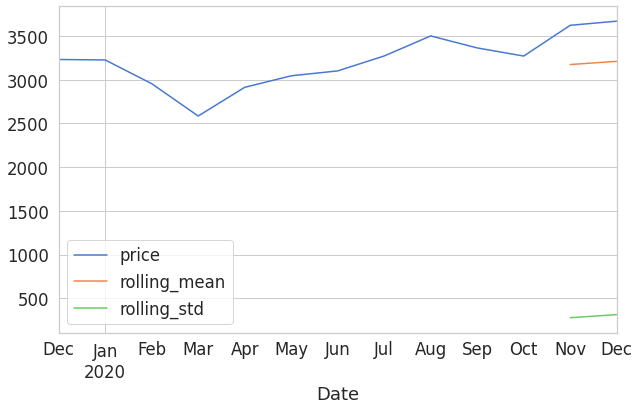

time: 664 ms


In [19]:
df.plot()

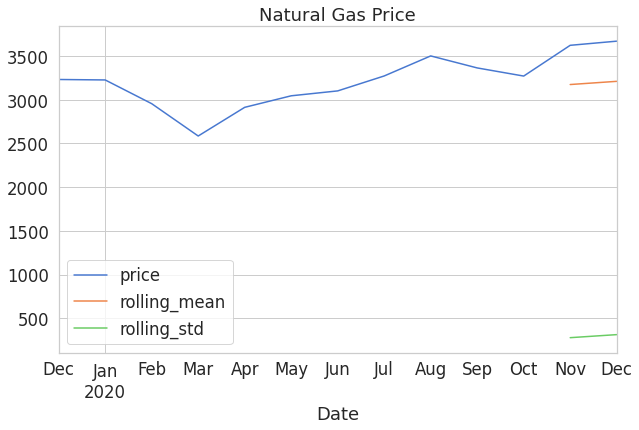

time: 784 ms


In [16]:
window = 12
df['rolling_mean'] = df.price.rolling(window=window).mean()
df['rolling_std'] = df.price.rolling(window=window).std()
df.plot(title='Natural Gas Price')
plt.show()

In [17]:
decomp = seasonal_decompose(df.price, model='multiplicative')
rcParams['figure.figsize'] = 10, 6
decomp.plot().suptitle('Multiplicative Decomposition', fontsize=14);

ValueError: x must have 2 complete cycles requires 24 observations. x only has 13 observation(s)